<a href="https://colab.research.google.com/github/ESQ0001/ImageMining/blob/master/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D,Dropout,AveragePooling2D,Conv2D, MaxPooling2D, Flatten, Input, GlobalAveragePooling3D
from keras.applications import MobileNet, ResNet50, VGG16, InceptionV3
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam,SGD
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [0]:

import pickle
#these are the images in vector format
pickle_in = open("drive/My Drive/Colab Notebooks/pixels_desserts.pickle","rb")
pixels = pickle.load(pickle_in)


In [0]:
#these are the labelled images
pickle_off = open("drive/My Drive/Colab Notebooks/labels_desserts.pickle","rb")
labels = pickle.load(pickle_off)


In [5]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


In [6]:
print(pixels.shape,labels.shape)

(16038, 150, 150, 3) (16038,)


chocolate_cake


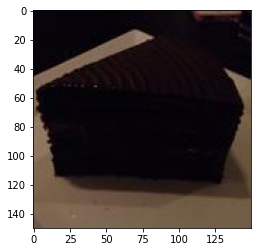

In [0]:
#manual checking of dataset
import matplotlib.pyplot as plt # conda install matplotlib -y
import numpy as np
n = 1328 #replace this number to check yourself
plt.imshow(np.array(pixels[n]))
print(labels[n])

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y_vec = labelencoder.fit_transform(labels)
y_vec


array([1, 1, 7, ..., 5, 1, 9])

In [8]:
from keras.utils import to_categorical
y_categorical = to_categorical(y_vec)
y_categorical

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
from sklearn.model_selection import train_test_split
seed = 23

from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 

  

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(pixels, y_vec, test_size=0.20, random_state=seed)

print('Training set shape: {}'.format(X_train.shape))
print('Training set shape: {}'.format(y_train.shape))
print('Test set shape: {}'.format(X_test.shape))

Training set shape: (12830, 150, 150, 3)
Training set shape: (12830,)
Test set shape: (3208, 150, 150, 3)


In [0]:
print(tf.__version__)

1.0.0


In [0]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [0]:
#this is an example of transfer learning using ResNet50
def create_model_ResNet50():

  base_model=ResNet50(weights='imagenet',include_top=False) #imports the vgg16 model and discards the last 1000 neuron layer.
  x=base_model.output
  
  x=GlobalAveragePooling2D()(x)
  #x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
  #x=Dense(1024,activation='relu')(x) #dense layer 2
  #x=Dense(512,activation='relu')(x) #dense layer 3
  x= Dropout(0.4)(x)
  preds=Dense(16,activation='softmax')(x) #final layer with softmax activation
  model=Model(inputs=(base_model.input),outputs=preds)
  return model
def train():
   model = create_model_ResNet50()
   opt=SGD(lr=0.01, momentum=0.9)
   model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
   print(model.summary())
   
   resNet50 = model.fit(x=X_train, y=y_train_one_hot, batch_size=32, epochs=15, verbose=1, validation_data=(X_test, y_test_one_hot), shuffle=True)
   test_eval = model.evaluate(X_test, y_test_one_hot, verbose=0)
   print('Test loss:', test_eval[0])
   print('Test accuracy:', test_eval[1])
   return resNet50

def load_trained_model(weights_path):
   model = create_model_ResNet50()
   model.load_weights(weights_path)
   return model

In [0]:
train()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 8s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
___________________________

In [0]:
test_eval = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])